## Homework 1

In [12]:
# importing packages

import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, plot_confusion_matrix

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

### A. Loading Data with a 80/20 Train Test Split

In [13]:
# importing CSV

url = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv"
df = pd.read_csv(url)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Group
0,-0.604285,-0.610629,0.026014,0.019710,0.406532,0.678796,0.524360,0.404739,B
1,-0.111772,-1.125178,0.744157,0.078315,0.088176,0.891009,0.018460,0.536511,B
2,-0.916802,1.965494,0.150022,0.388770,0.179276,0.064449,0.159279,0.951204,B
3,-0.280479,0.920669,0.208949,0.940153,0.854437,0.688172,0.365126,0.985259,A
4,1.856025,1.043214,0.167088,0.207002,0.979049,0.641019,0.628764,0.045912,B


In [14]:
# checking for missing data
df.isnull().sum()

X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
Group    0
dtype: int64

In [15]:
predictors = ["X1", "X2", "X3", "X4", "X5","X6", "X7", "X8"]

X = df[predictors]
y = df["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### B. SVM Model

In [16]:
# Z scoring
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

# Creating SVM model
svm = SVC(probability = True)

pipe = make_pipeline(z,svm)

param_grid = {
    'svc__kernel': ['linear', 'rbf'], 
    'svc__C': [0.001, 0.01, 1, 5, 25, 50], 
    'svc__gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 5]
}

# GridSearchCV for Hyperparameter Tuning
grid = GridSearchCV(pipe, param_grid = param_grid, scoring = "accuracy", cv = 5, refit = True)

# Fitting Model
grid.fit(X_train, y_train)

# Best Parameters
print("Best hyperparameters: ", grid.best_params_)

# Accuracy of SVM Model for train and test sets
print("Train Acc:", accuracy_score(y_train, grid.predict(X_train)))
print("Test Acc :", accuracy_score(y_test, grid.predict(X_test)))

# ROC/AUC for train and test sets
print("Train AUC:", roc_auc_score(y_train, grid.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))


Best hyperparameters:  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Train Acc: 0.81125
Test Acc : 0.76
Train AUC: 0.888258708387188
Test AUC : 0.8298611111111112


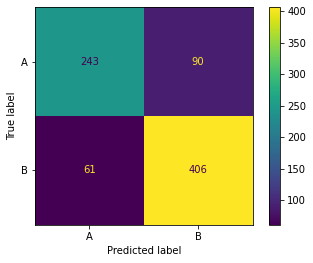

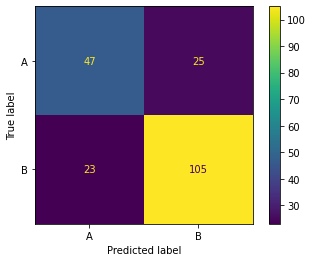

In [17]:
# Confusion matrix of train set
plot_confusion_matrix(grid, X_train, y_train)

# Confusion matrix of test set
plot_confusion_matrix(grid, X_test, y_test)


### C. Selected Hyperparameters

GridSearch found that the kernel "rbf" with a C of "1" and a gamma of "0.1" was the best.

### D. Logistic Regression Model

D. 💻 Use sklearn to build a Logistic Regression on the same data with the same train/test set. Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.

The accuracy score of the train set is:  0.7625
The accuracy score of the test set is:  0.79
Train AUC: 0.8441396428548463
Test AUC : 0.8426649305555556


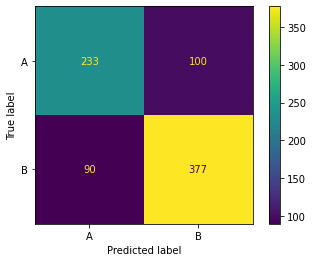

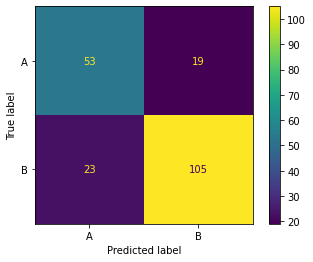

In [18]:
# Logistic Regression Model

# Creating model
lr = LogisticRegression(penalty = "none")

# Z-scoring
z = StandardScaler()
z.fit(X_train)
z_train = z.transform(X_train)
z_test = z.transform(X_test)

# Fitting model
lr_model = lr.fit(X_train, y_train)

# Accuracy of the train and test set
accuracy_train = accuracy_score(y_train, lr_model.predict(X_train))
accuracy_test = accuracy_score(y_test, lr_model.predict(X_test))
print('The accuracy score of the train set is: ', accuracy_train)
print('The accuracy score of the test set is: ', accuracy_test)

# ROC/AUC of the train and test set
print("Train AUC:", roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]))

# Confusion matrix of train set
plot_confusion_matrix(lr_model, X_train, y_train)

# Confusion matrix of test set
plot_confusion_matrix(lr_model, X_test, y_test)



### E. K-Nearest Neighbors

Use sklearn to build a KNearest Neighbors model on the same data with the same train/test set (use GridSearch to choose `n_neighbors`).Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.   ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Lectures/LectureNotebooks/KNN--Class_14.ipynb))

Train:  0.76
Test :  0.75
Train AUC: 0.8448984316222004
Test AUC : 0.8301866319444444


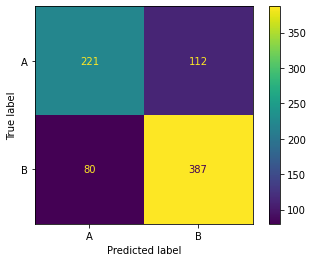

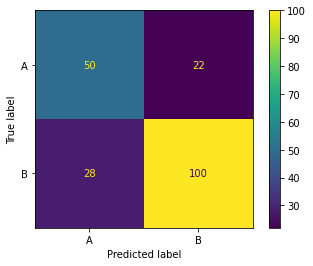

In [19]:
# K-Nearest Neighbors

# Creating model
knn = KNeighborsClassifier()

# Z-scoring
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

# Create pipeline
pipe = make_pipeline(z, knn)
ks = {"kneighborsclassifier__n_neighbors": range(1, 30)}

# GridSearchCV
grid = GridSearchCV(pipe, ks, cv = 5, scoring = 'accuracy', refit = True)
grid.fit(X_train, y_train)

# Accuracy of the train and test set
print("Train: ", accuracy_score(y_train, grid.predict(X_train)))
print("Test : ", accuracy_score(y_test, grid.predict(X_test)))

# ROC/AUC of the train and test set
print("Train AUC:", roc_auc_score(y_train, grid.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

# Confusion Matrices for the train and test set
plot_confusion_matrix(grid, X_train, y_train)
plot_confusion_matrix(grid, X_test, y_test)

### F. Model Performance

Three machine learning models were constructed for this project and the performance of each was measured. The results of the following models will be shared: Support Vector Machine (SVM), Logistic Regression, and K-Nearest Neighbors (KNN). The SVM model was the first model used. First the accuracy of this model was determined. Accuracy scores range from 0.00 (0%) and 1.00 (100%). The training accuracy was 0.81125, which signifies that this model was able to correctly predict the "Group" approximately 81.13% of the time. The test accuracy was 0.76, which signifies that this model was able to correctly predict the "Group" 76.00% of the time. In addition to the accuracy metrics, the performance examined the ROC-AUC metric, which reflects efficiency and demonstrates if the model is simply guessing or perfectly classifying the data. Scores range from 0.5 to 1, where a higher value is favored. In the SVM model, the training set ROC-AUC was calculated to be approximately 0.888 and the testing set ROC-AUC was approximately 0.830. A confusion matrix was also created to specifically see how many of the cases the model was able to predict. In the confusion matrix, the top left and bottom right cell are of primary interest as they reflect how many cases were 'true positives' and 'true negatives.' True positives and negatives are scenarios when the outcome predicted match the actual outcome (e.g.g., a model predicts "A" when it is actually "A"). The two other cells demonstrate the number of false positive and false negatives (e.g., a model predicts "A" when it is actually "B"). In this model's confusion matrix, we see that the majority of the cases were classified correctly. Overall, this model performed reasonably well is classifying the dataset into its positive and negative cases. However, other models were examiend to determine their effectiveness.

The Logistic Regression was also employed for this dataset to predict the "Group" based on the dataset given. In this model, the accuracy of the training data was 0.7625, or 76.25%, while the accuracy of the testing data was 0.79, or 79.00%. The ROC-AUC of the training set was 0.844, while the ROC-AUC of the testing set was 0.843. In this model's confusion matrix, we see that the majority of the cases were classified correctly. From these metrics, we see that this model performed slightly better than the SVM model. Although the ROC-AUC scores were roughly similar, the accuracy of the testing set was higher in the Logistic Regression Model than the SVM model.

The final model used for this dataset was the K-Nearest Neighbors model. In this model, the accuracy of the training data was 0.76, or 76.00%, while the accuracy of the testing data was 0.75, or 75.00%. The ROC-AUC of the training set was approximately 0.845 while the ROC-AUC of the testing set was approximately 0.830. In this model's confusion matrix, we see that the majority of the cases were classified correctly. These metrics when compared to the other models suggest that the KNN model was similar in accuracy to the SVM model, but had a worse AUC-AUC than the Logistic Regression model.

Based on these results, I would recommend utilizing the Logistic Regression model for the project as it demonstrated the highest test accuracy out of these three models, which is important in determining the correct "group" for new incoming data. This model also had the highest ROC-AUC scores, which is favorable. This model is also computationally efficient, which is also favorable.

### G. Logistic Regression Versus KNN in Production

In production, computational efficiency and accuracy are equally important. The logistic regression model attempts to solve a linear equation to find the best or most optimal coefficients. SVM attempts to solve a quadratic equation to find the best or most optimal hyperplane that separates the classes, which can become computationally expensive for large datasets. KNN calculates the distances between each point ("neighbor") in a dataset, which can also become computationally expensive. In production, the datasets may be substantially larger than the one utilized for this project, making future predictions computationally expensive. Thus, the logistic regression model is favored in this aspect. In terms of accuracy, the logistic regresion model was determined to yield the highest accuracy score while all of the models had relatively similar ROC-AUC scores. This information combined suggests that the most optimal model for production would be the logistic regression model.